In [43]:
import importlib

from src.processing.rf import split_data
from src.processing.rf import create_data
from src.data import shape_processor
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.data import gedi_pipeline
import seaborn as sns
from fastai.tabular.all import load_pickle
from src.constants import DATA_PATH
importlib.reload(gedi_pipeline)
importlib.reload(split_data)
importlib.reload(create_data)

2023-06-15 22:40:37,789 DEBUG: Logger /home/jk871/fire-regen/src/data/gedi_pipeline.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]
2023-06-15 22:40:37,793 DEBUG: Logger /home/jk871/fire-regen/src/processing/rf/create_data.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]


<module 'src.processing.rf.create_data' from '/home/jk871/fire-regen/src/processing/rf/create_data.py'>

## Create Training Data

For training, we use only unburned gedi shots. We want to match them with the appropriate LANDSAT rasters.

In [40]:
# Obtain GEDI data.
_, gedi_unburned = gedi_pipeline.load_stage_9(3)

In [45]:
create_data.create_and_save_data_for_rf(gedi_unburned, 1984, 2020, save=True, save_folder=f"{DATA_PATH}/rf/unburned")

2023-06-15 22:41:00,151 DEBUG: Matching gedi shots from 1984 [in create_and_save_data_for_rf at /home/jk871/fire-regen/src/processing/rf/create_data.py:17]
2023-06-15 22:41:00,162 DEBUG: Sampling raster. [in create_and_save_data_for_rf at /home/jk871/fire-regen/src/processing/rf/create_data.py:20]
Process columns.
2023-06-15 22:42:56,602 DEBUG: Save DF in a pickle file. Training data for year 1985 [in create_and_save_data_for_rf at /home/jk871/fire-regen/src/processing/rf/create_data.py:30]
2023-06-15 22:43:00,802 DEBUG: Matching gedi shots from 1985 [in create_and_save_data_for_rf at /home/jk871/fire-regen/src/processing/rf/create_data.py:17]
2023-06-15 22:43:00,819 DEBUG: Sampling raster. [in create_and_save_data_for_rf at /home/jk871/fire-regen/src/processing/rf/create_data.py:20]
Process columns.
2023-06-15 22:45:08,025 DEBUG: Save DF in a pickle file. Training data for year 1986 [in create_and_save_data_for_rf at /home/jk871/fire-regen/src/processing/rf/create_data.py:30]
2023-06-

,shot_number,longitude,latitude,agbd,agbd_pi_lower,agbd_pi_upper,agbd_se,beam_type,sensitivity,pft_class,...,SR_B7_2018,NDVI_2018,SR_B1_2019,SR_B2_2019,SR_B3_2019,SR_B4_2019,SR_B5_2019,SR_B6_2019,SR_B7_2019,NDVI_2019
68,184891100200081436,-117.993053,37.035598,42.480953,13.279391,88.198257,2.987548,full,0.964706,6,...,0.159807,0.350696,0.055148,0.066407,0.089838,0.097584,0.213026,0.205125,0.156696,0.372951
69,184891100200081437,-117.992563,37.035940,41.270653,12.608580,86.445198,2.986958,full,0.967364,6,...,0.164793,0.339546,0.056767,0.068512,0.092656,0.100616,0.215811,0.208021,0.160017,0.365083
70,184891100200081438,-117.992074,37.036281,17.788033,1.812951,50.249866,2.982302,full,0.965438,6,...,0.157656,0.353749,0.056143,0.067949,0.092852,0.099670,0.215315,0.201029,0.155512,0.368379
71,184891100200081439,-117.991585,37.036622,33.051270,8.278574,74.318108,2.983642,full,0.963230,6,...,0.168101,0.346303,0.057519,0.069359,0.094414,0.102917,0.220873,0.210225,0.163425,0.365749
74,184891100200081442,-117.990122,37.037642,36.370045,9.975603,79.265160,2.984823,full,0.968866,6,...,0.160357,0.345976,0.057120,0.068236,0.092223,0.099419,0.213281,0.209080,0.161125,0.365290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27623083,42030300300286932,-119.945451,36.864333,15.163097,1.045430,45.772022,2.983117,coverage,0.950354,8,...,0.086015,0.681405,0.020070,0.026914,0.056355,0.044112,0.290223,0.154353,0.077567,0.734638
27624716,187680600300533641,-119.909263,36.864995,19.482615,2.380640,53.069633,2.981994,full,0.967217,8,...,0.083705,0.721428,0.019080,0.025940,0.055177,0.041451,0.313807,0.148686,0.074234,0.760302
27626129,21830200200228428,-119.881873,36.860581,1.564893,-9999.000000,17.078108,3.004118,coverage,0.960046,6,...,0.126461,0.627386,0.036300,0.043637,0.072795,0.069650,0.350130,0.208022,0.123668,0.667731
27626205,34550300300287532,-119.883317,36.864717,8.933409,0.013291,34.368629,2.987432,coverage,0.956619,8,...,0.126300,0.571853,0.033328,0.041009,0.071684,0.071971,0.294971,0.202937,0.121736,0.608696


### Plot split data in a grid

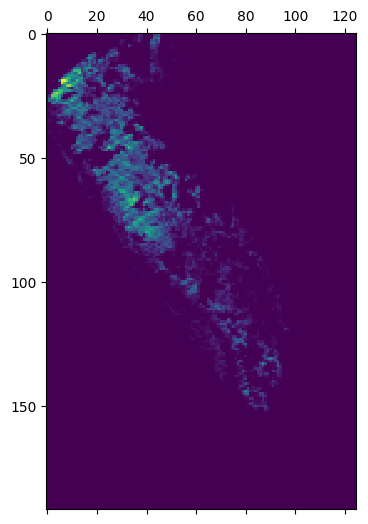

In [10]:
def plot_grid(df):
    df_grouped = df.groupby(['x', 'y']).count().reset_index()[['x', 'y', 'agbd']].rename(columns={'agbd':'shot_count'})
    nrows = 192
    ncols = 125

    image = np.zeros(nrows*ncols)
    image = image.reshape((nrows, ncols))

    for row_idx in range(df_grouped.shape[0]):
        row = df_grouped.iloc[row_idx]
        image[int(row.y), int(row.x)] = int(row.shot_count)

    plt.matshow(image)
    plt.show()
    
plot_grid(gedi_gridded)

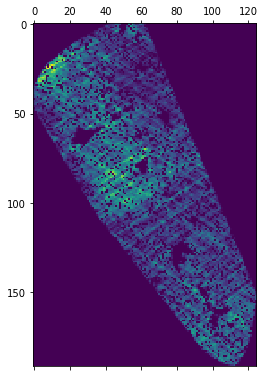

In [57]:
plot_grid(gedi_train)